# HW1 : MAT 321 - Numerical Analysis and Scientific Computing - Fall 2025

Due: September 18th at 11:59pm 

* You can (and probably should) discuss assignments with other students and the course staff but you must write and understand any solutions/code that you submit. This rule should be followed in good faith and with adherence to the Honor Code. 
* You must upload the assignment to Canvas before the deadline. 
* All the code you hand in should be contained in this notebook, and submitted in the .ipynb format (not the PDF format). The written solutions can be either typed up in the notebook (preferred) or hand written and handed in through gradescope as well (if you choose this option, you should also submit a PDF but the code should still be in .ipynb format).


There is also a lot of code, but most of it is provided for you. Each function you have to complete is indicated by

### `TODO: Add your code here`

You should try to understand what the rest of the code does, but you should not modify it. Each programming question has tests so that you can check you answer. Feel free to add more tests. 

## Problem 1: Back to precalc

(You should work on this problem after the 3rd lecture, which will be on numerical stability. The other problems can be done after the 2nd lecture).

Implement a **numerically stable** quadratic formula. Write a function with that takes as inputs $a,b,c$, that are coefficients of a quadratic polynomial, and outputs $x1,x2$ are the roots
which are solutions to
$$
a x^2 + bx + c = 0.
$$
The roots should be sorted such that  $x1 \leq x2$. 
You may assume that $a \not = 0$, and $ b^2 > 4ac$. To be more specific, your implementation should avoid cancellation error of the kind discussed in class. If you pass the test provided here (and don't hardcode the solutions!) you can assume you answered the question correctly.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def myquad(a: np.float64, b: np.float64, c: np.float64):
    ### TODO: ADD YOUR CODE HERE
    x1, x2 = 0,0    

    return x1, x2


## The tests below are provided for you. Make sure they pass! Do not modify the code below. 

# Test a
# Check that it works for any easy polynomial 
def error_check(coeffs, roots, count):
    x1,x2 = myquad(coeffs[0],coeffs[1],coeffs[2])
    err1 = np.abs(x1-roots[0]) / np.abs(roots[0])
    err2 = np.abs(x2-roots[1]) / np.abs(roots[1])

    tol = np.float64(1e-14)
    if err1 < tol and err2 < tol:
        print(f'Passed test {count}!')
    else:
        print(f'Failed test {count}!!!')
        print(f'Error in root 1 is= {err1:.2e}, Error in root 2 = {err2:.2e}')


# Test 0
a = np.float64(1)
b = np.float64(2)
c = np.float64(-3)
error_check([ a,b,c ],  [-3, 1], 1)

# Test 1
a = np.float64(1e-8)
b = np.float64(1)
c = np.float64(2)
s2 = np.float64(-2.0000000400000016000000800000044800)
s1 = np.float64(-9.9999997999999959999998399999920000e7)
error_check([ a,b,c ],  [s1, s2], 2)


# Test c
a = np.float64(-0.03)
b = np.float64(1234)
c = np.float64(0.002)

s1 = np.float64(-1.620745542885895880515774e-6)
s2 = np.float64(41133.33333495407887621923)
error_check([ a,b,c ],  [s1, s2], 3)


# Test d
a = 1e-16
b = 1
c = -1
s1 = 1
[x1,x2] = myquad(a,b,c)
err1 = np.abs(x2-s1)/np.abs(s1)
tol = np.float64(1e-14)
if err1 < tol:
    print(f'Passed test {4}!')
else:
    print(f'Failed test {4}!!!')
    print(f'Error in root 2 = {err1:.2e}')



Failed test 1!!!
Error in root 1 is= 1.00e+00, Error in root 2 = 1.00e+00
Failed test 2!!!
Error in root 1 is= 1.00e+00, Error in root 2 = 1.00e+00
Failed test 3!!!
Error in root 1 is= 1.00e+00, Error in root 2 = 1.00e+00
Failed test 4!!!
Error in root 2 = 1.00e+00


## Problem 2: Friction
The [Darcy friction coefficient](https://en.wikipedia.org/wiki/Darcy_friction_factor_formulae) $f$ for turbulent flow in a pipe is defined
in terms of the Colebrook-White equation for large Reynolds number
$Re$ (greater than 4000 or so)<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1):

$$\frac{1}{\sqrt{f}} = -2 \log_{10} \left( \frac{\epsilon/D_h}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{f}} \right)$$

Here $\epsilon$ is the height of the surface roughness and $D_h$ is the diameter
of the pipe; we refer to $\epsilon/D_h$ as the roughness.  If we let $u = 1/\sqrt{f}$, we can rewrite this as a fixed point equation

$$u_* = -\alpha \log(\beta + \gamma u_*)$$

where $\alpha = 2/\log(10)$, $\beta=(\epsilon/D_h)/3.7$, and $\gamma = 2.51/\mathrm{Re}$. These quantities are implemented below for a given $Re$ and $\epsilon$.  


<a name="cite_note-1"></a>1. [^](#cite_ref-1) Solving this problem requires no knowledge of turbulent flows.

In [30]:
## This functions is implemented for you - Nothing to do here.
def darcy_params(roughness, Re):
    alpha = 2/np.log(10)
    beta = roughness/3.7
    gamma = 2.51/ Re
    return alpha, beta, gamma


Alternately, we can write this as the problem of finding a zero of

$$g(u) = u + \alpha \log(\beta + \gamma u).$$

$g(u)$ is implemented for you below:

In [31]:
## This functions is implemented for you - Nothing to do here.
def darcy_resid(roughness, Re, u):
    alpha, beta, gamma = darcy_params(roughness, Re)
    gu = u + alpha*np.log(beta + gamma*u)
    return gu

In this problem, we consider the computation of $u_* > 0$ (and hence $f$) for different values of the Reynolds number.  We note that $\alpha$, $\beta$, and $\gamma$, are all positive numbers that are less than one in this problem, and $u_*=1/\sqrt{f}$ must also be positive.

As a test case, we consider flow through a 10 cm pipe with roughness height of 0.1 mm (so the roughness factor is $10^{-3}$), and Reynolds numbers of $10^4$, $10^5$, and $10^6$.

### 2.1
 Note that $0 < \log(1+z) < z$ for $z > 0$.  Using properties of logs, show that for $u > 0$, $g(u) = u + \alpha \log(\beta + \gamma u)$ satisfies
$$u + \alpha \log(\beta) < g(u) < (1+\alpha \gamma/\beta) u + \alpha \log(\beta)$$



<font color='green'>

### Write your answer here

<font>


### 2.2 
Using the previous result, give an interval where $g$ changes sign (so $g(u) = 0$ is guaranteed to have a solution in this interval).  Verify the sign change for our test setting with Reynolds number of $10^4$. Complete the function in `darcy_bounds` that computes these bounds for a given Reynolds number and roughness.


In [32]:
def darcy_bounds(alpha, beta, gamma):
    l =1; h = 1
    ### TODO: ADD YOUR CODE HERE
    return l, h


### The code below is written for you. No need to change it
roughness = 0.1
Re = 1e4
alpha, beta, gamma = darcy_params(roughness, Re)

# This function needs to be implemented in darcy_functions.py
l, h= darcy_bounds(alpha, beta, gamma)

gl = darcy_resid(roughness, Re, l)
gh = darcy_resid(roughness, Re, h)

#  Test 1: make sure that gh and gl have opposite signs:
if (gl*gh >=0):
    print('g(l) and g(h) have the same sign!')
if (l > h):
    print('lower bound > upper bound! swap them')


g(l) and g(h) have the same sign!


### 2.3
 Using the lower bound in the previous step as a starting guess, run the fixed point iteration $u_{k+1} = -\alpha \log(\beta + \gamma u_k)$ for 100 steps. Complete the code in `darcy_fp`. Plot $|g(u_k)|$ vs $k$ on a semilog scale for Reynolds numbers $10^4$, $10^5$, and $10^6$.  What do you observe about the convergence?


Residuals:  [-3.13640345 -3.13640345 -3.13640345 -3.13640345 -3.13640345 -3.13640345
 -3.13640345 -3.13640345 -3.13640345 -3.13640345]


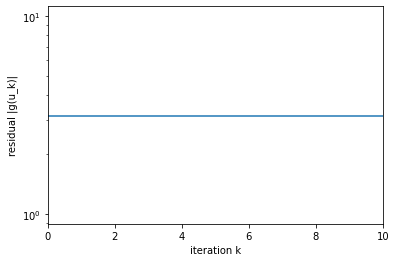

In [33]:
def darcy_fp(roughness, Re):
    # Start from the lower bound and run 100 iterations of fixed point,
    # returning all iterations. Do not return the initial guess
    n = 100
    us = np.zeros(n)
    # TODO: Implement your fixed point iteration here

    return us

# Test 2: Checking convergence of the fixed point iteration with the residual
Re = 10**6 ##  # TODO: Vary the your fixed point iteration here
us = darcy_fp(roughness, Re)

# A "Semilog" plot is one where one of axis is in log scale. Here, the y-axis.
# Generating a semilogy plot of the residual 
residual = darcy_resid(roughness, Re, us)

plt.semilogy(abs(residual))
plt.ylabel('residual |g(u_k)|')
plt.xlabel('iteration k')
plt.xlim([0, 10])
print('Residuals: ',  residual[:10])



<font color='green'>

### What do you observe? Write your answer here

<font>



### 2.4
 Subtract the fixed point equation from the fixed point iteration equation and use a Taylor expansion to get an error iteration of the form
$$e_{k+1} = -\frac{\alpha \gamma}{\beta+\gamma u_*} e_k + O(e_k^2).$$


<font color='green'>

### Write your answer here


<font>

### 2.5

Numerically verify that the rate of convergence from part 4 agrees with the rates of convergence seen in the part 3.  To do this, we will approximate the true solution as the final iteration of our fixed point iteration  $u^* \approx u_{100}$ (after having convinced ourselves that $g(u_{100}) = \mathcal{O}(\epsilon_{\text{mach}})$), and plot the error estimate

$$
\text{est}_k =  \rho^k | u^* - x_0|
$$

for $\rho = (\frac{\alpha \gamma}{\beta+\gamma u_*})$. This is implemented below you only need run the iteration, and observe that the two match. 

residual at iter 100 = -3.1364034481339895


(0.0, 10.0)

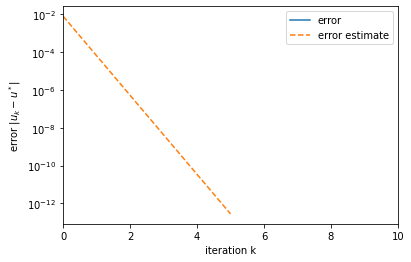

In [41]:
##  Checking convergence of the fixed point iteration with the error
# Nothing to do here but watch - assuming darcy_fp was correctly implemented!

Re = 10**4 
us = darcy_fp(roughness, Re)

# Generating a semilogy plot of the error and error estimate 
u_star = us[-1] #% Approximate solution with last iterate
print(f"residual at iter 100 = {darcy_resid(roughness, Re, us)[-1]}")
error = np.abs(us - u_star)

# Estimated contraction factor
rho = alpha * gamma / ( beta + gamma * u_star) 
# Error estimate
# Get initial estimate
alpha, beta, gamma = darcy_params(roughness, Re)
l, h= darcy_bounds(alpha, beta, gamma)
error_est = np.abs( l - u_star) * (rho**(np.arange(1,7)))

plt.semilogy(abs(error), label = 'error')
plt.semilogy(abs(error_est), '--', label = 'error estimate')
plt.legend()
plt.ylabel('error $|u_k - u^*|$')
plt.xlabel('iteration k')
plt.xlim([0, 10])

### 2.6

Write a Newton iteration for finding a zero of $g$ (with the lower bound from part 2 as an initial guess, and run 10 steps). Plot the residuals on a semilog scale for Reynolds number $10^4$ to illustrate quadratic convergence.



Text(0.5, 1.0, 'Convergence of Newton iterates')

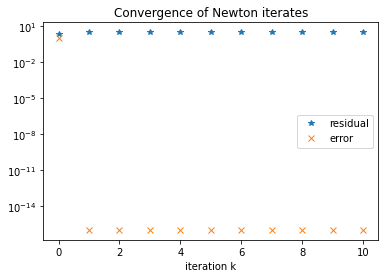

In [35]:

def darcy_resid_derivative(roughness, Re,u):
    alpha, beta, gamma = darcy_params(roughness, Re)
    dgu = 1 + alpha * gamma / ( beta + gamma * u)
    return dgu

def darcy_newton(roughness, Re):
    # Start from the lower bound and run 10 iterations of the fixed point iteration,
    # returning all iterations. Do not return the initial guess.
    alpha, beta, gamma = darcy_params(roughness, Re)
    l, u = darcy_bounds(alpha,beta, gamma)
    n = 10
    us = np.zeros(n)
    # TODO: Implement your Newton's iteration here

    return us

Re = 10**4
us = darcy_newton(roughness, Re)

# include initial guess
us = np.concatenate([ np.array([l]), us])


##
error_newton = np.abs(us - u_star) # Approximate solution with last iterate
residual_newton = np.abs(darcy_resid(roughness, Re, us))

plt.semilogy(np.arange(11), residual_newton + 1e-16 , '*', label = 'residual') #% Add eps = machine epsilon to avoid getting a 0
plt.semilogy(np.arange(11), error_newton + 1e-16 , 'x', label = 'error')
plt.xlabel('iteration k')
plt.legend( )
plt.title('Convergence of Newton iterates')


## Problem 3: Sometimes, it's slow

Solve exercise 1.6 from Suli and Mayers:


### 3.1
 Suppose that $f(\xi) = f'(\xi) = 0$, $f''(\xi) \not= 0$ so that $f$ has a
double root at $\xi$, and that $f''$ is defined and continuous in a neighborhood
of $\xi$. If $(x_k)$ is a sequence obtain by Newton's method, show that
$$
\xi - x_{k+1} = -\frac{1}{2} \frac{(\xi - x_k)^2 f''(\eta_k)}{f'(x_k)} =
\frac{1}{2} (\xi - x_k) \frac{f''(\eta_k)}{f''(\chi_k)}
$$
where $\eta_k$ and $\chi_k$ both lie between $\xi$ and $x_k$.




<font color='green'>

### Write your answer here


<font>




### 3.2
Suppose, further,
that $0 < m < |f''(x)| < M$ for all $x$ in the interval
$[\xi-\delta,\xi+\delta]$ for some $\delta > 0$, where $M < 2m$; show that if
$x_0$ lies in this interval the iteration converges to $\xi$, and that
convergence is linear, with rate $\log_{10} 2$ (i.e. $\mu=1/2$ in the definition below).


------
Note:
For this problem, you should work with the limit definition of linear convergence:

Here is the definition in Suli and Mayers (Definition 1.4):
We say that a sequence ${x_k}$ converges linearly to $x^*$ linearly if

$$  \lim_{k \rightarrow \infty } \frac{ |x_{k+1} - \xi | }{ |x_k - \xi | } = \mu$$

for $ \mu < 1$. 


<font color='green'>

### Write your answer here

<font>

### 3.3
Verify the conclusion of the exercise by making a plot of
$\log_{10}$ of the absolute error versus the iteration number when preforming
Newton's method to find the a solution of $e^x=1+x$, starting at $x_0$ = 1, for $30$ iterations.



/Users/marcaurele/opt/anaconda3/envs/wilson2/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


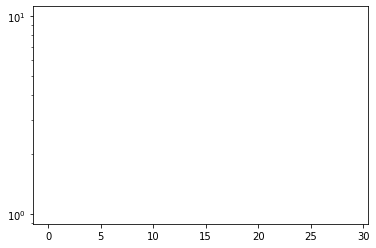

In [36]:
### Run a Newton iteration and make a plot of absolute error vs iteration number

xk =1
errors = np.zeros(30)
for k in range(30):
    ## TODO: Replace this with your code
    xkp1 = xk 
    errors[k] = 0
    
plt.semilogy(errors)


## Problem 4: Welcome to the race!

The Legendre polynomials are a sequence of polynomials that satisfy the recursion formula:
$P_0(x) = 1$,  $P_1(x) = x$, and for $n \ge 1$
$$
(n+1)P_{n+1}(x)=(2n+1)x P_n(x) - n P_{n-1}(x).
$$
The $n$-th Legendre polynomial is of degree $n$, and has $n$ real distinct roots.

Implement a function that finds the $n$ roots of the $n$-th Legendre polynomial $P_n(x)$.<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1). Write a function with calling sequence
$$
rts = \text{legroots}(n),
$$
where $n$ (integer) is the degree of the Legendre polynomial, and $rts$ is a vector of size $n$ (double) of the roots of $P_n(x)$ sorted in ascending order
$rts(1)  \le \cdots \le rts(n)$.

Hint: 
All the roots of $P_n(x)$ are contained in $[-1,1]$ and the roots are
separated by at least distance $1/(10 n^2)$ (in particular, there are no double roots, which implies that there is a sign change around every root). 
* First implement a function computing $P_n(x)$ using the recursion formula
* Find $n$ disjoint intervals
contained in $[-1,1]$, where $P_n(x)$ changes sign. 
* Finally, use the bisection
method to determine the roots to close to machine precision.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) These points are important enough to have their own name: *Gauss-Legendre nodes*. We will come back to them in the second half of the semester. To read more about their history and computation (entirely optional), see this [essay](https://pi.math.cornell.edu/~ajt/papers/QuadratureEssay.pdf).



In [ ]:
# First implement P_n(x) using the recursion formula
def P(x: np.float64, n: int) -> np.float64:
    # Returns the value of n-th Legendre polynomial at x, for x in [-1, 1]
    # TODO: Implement this helper function first. Replace this with your code
    return 0


### Tests provided for you. No need to change the code below.

## Test 1: Check P_n(x) is correct
tolerance = 1e-14
passed= True
for x, n in [ (0.3, 1), (0.5, 2), (-0.7, 30)]:
    coefs = np.zeros(n+1); coefs[-1] =1
    error = np.polynomial.legendre.legval(x,coefs) - P(x,n)
    if np.abs(error) > tolerance:
        print(f"Test failed for x={x}, n={n}! Check your P(x,n) function. P(x,n) = { P(x,n)}, where it should be = {np.polynomial.legendre.legval(x,coefs)} ")
    else:
        print("Test passed!")



Test failed for x=0.3, n=1! Check your P(x,n) function. P(x,n) = 0, where it should be = 0.3 
Test failed for x=0.5, n=2! Check your P(x,n) function. P(x,n) = 0, where it should be = -0.125 
Test failed for x=-0.7, n=30! Check your P(x,n) function. P(x,n) = 0, where it should be = -0.015651656208053255 


In [ ]:

def legroots(n: int) -> np.ndarray:
    # Returns the n roots of the n-th degree polynomial
    roots = np.zeros(n)
    # TODO: Find $n$ disjoint intervals
    # contained in $[-1,1]$, where $P_n(x)$ changes sign. 
    # TODO: Then use bisection to find the roots

    return roots

### Tests provided for you. No need to change the code below.

## Test 2: check the roots are correct
count = 0
ns = [ 3, 12, 17, 20]
for idx, n in enumerate(ns):
    sol, _ = np.polynomial.legendre.leggauss(n)

    err = np.max(np.abs(np.array(legroots(n)) - sol))
    if err < tolerance:
        count = count + 1
        print(f"Passed test {idx} for n={n}")
    else:
        print(f"Failed test {idx} for n={n}")

print(f"Passed {count} out of {len(ns)} tests")

Failed test 0 for n=3
Failed test 1 for n=12
Failed test 2 for n=17
Failed test 3 for n=20
Passed 0 out of 4 tests
